### **Integração de Lógica Fuzzy na Regressão Logística**  
A lógica fuzzy pode ajudar a suavizar as decisões da regressão logística ao introduzir um grau de incerteza, especialmente útil quando os dados têm variabilidade alta ou zonas de transição difíceis de modelar.

---

## **1. Definição de Conjuntos Fuzzy para Odds**  
Podemos categorizar as odds em conjuntos fuzzy para capturar melhor as transições entre diferentes intervalos.

### **Exemplo de Conjuntos Fuzzy**  
Podemos definir três categorias para as odds:
- **Baixa** (1.0 a 1.8) → Indica que o evento é mais provável de acontecer.
- **Média** (1.8 a 2.5) → Transição, onde há mais incerteza.
- **Alta** (2.5 a 4.0) → Indica que o evento é menos provável.

A transição entre esses valores não é abrupta, mas sim gradual. Assim, podemos definir funções de pertinência fuzzy para cada categoria.

---

## **2. Criando Conjuntos Fuzzy no Python**
A biblioteca `scikit-fuzzy` (`skfuzzy`) nos permite criar e manipular conjuntos fuzzy.

### **Criando Conjuntos Fuzzy para Odds**

In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.membership as mf
import matplotlib.pyplot as plt

In [3]:

# Definição do intervalo das odds
x_odds = np.arange(1.0, 4.1, 0.1)

# Criando os conjuntos fuzzy
odd_baixa = mf.trimf(x_odds, [1.0, 1.4, 1.8])
odd_media = mf.trimf(x_odds, [1.4, 2.2, 2.5])
odd_alta = mf.trimf(x_odds, [2.2, 3.0, 4.0])


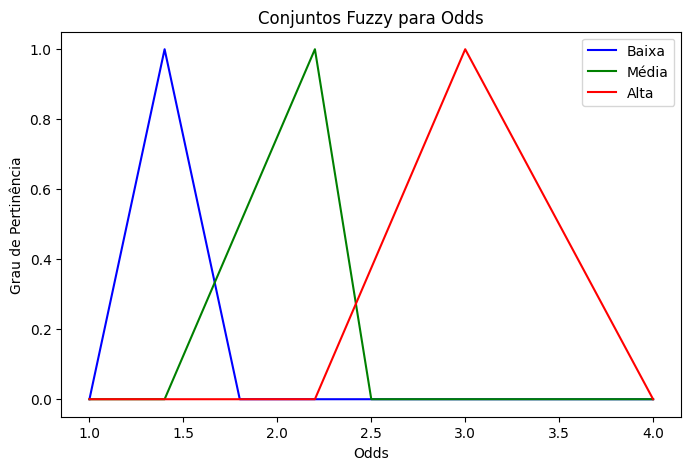

In [4]:

# Plotando os conjuntos fuzzy
plt.figure(figsize=(8, 5))
plt.plot(x_odds, odd_baixa, 'b', label='Baixa')
plt.plot(x_odds, odd_media, 'g', label='Média')
plt.plot(x_odds, odd_alta, 'r', label='Alta')
plt.xlabel('Odds')
plt.ylabel('Grau de Pertinência')
plt.title('Conjuntos Fuzzy para Odds')
plt.legend()
plt.show()


Isso gera um gráfico onde cada odd tem um grau de pertinência nos conjuntos fuzzy.

---

## **3. Criando Conjuntos Fuzzy para a Regressão Logística**
A regressão logística retorna uma probabilidade entre 0 e 1. Podemos criar conjuntos fuzzy para essa saída:

- **Baixa Confiança** (0 a 0.3) → O modelo indica que a previsão de 0 é confiável.  
- **Média Confiança** (0.3 a 0.7) → Zona de transição, onde há incerteza.  
- **Alta Confiança** (0.7 a 1.0) → O modelo indica que a previsão de 1 é confiável.  


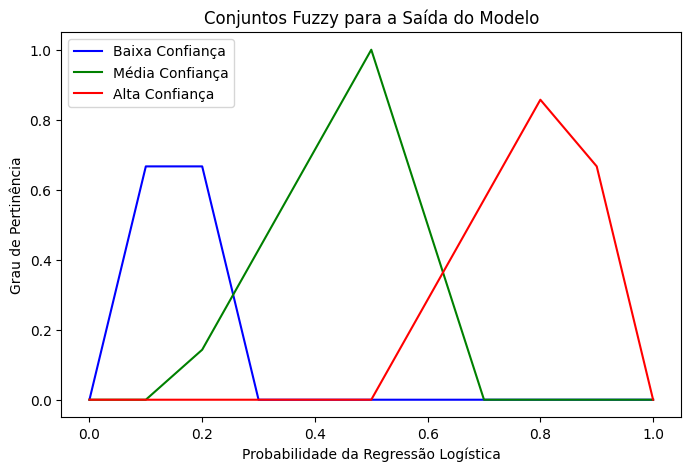

In [5]:
# Definição do intervalo das previsões da regressão logística
x_pred = np.arange(0, 1.1, 0.1)

# Criando conjuntos fuzzy para previsões do modelo
conf_baixa = mf.trimf(x_pred, [0.0, 0.15, 0.3])
conf_media = mf.trimf(x_pred, [0.15, 0.5, 0.7])
conf_alta = mf.trimf(x_pred, [0.5, 0.85, 1.0])

# Plotando
plt.figure(figsize=(8, 5))
plt.plot(x_pred, conf_baixa, 'b', label='Baixa Confiança')
plt.plot(x_pred, conf_media, 'g', label='Média Confiança')
plt.plot(x_pred, conf_alta, 'r', label='Alta Confiança')
plt.xlabel('Probabilidade da Regressão Logística')
plt.ylabel('Grau de Pertinência')
plt.title('Conjuntos Fuzzy para a Saída do Modelo')
plt.legend()
plt.show()


## **4. Aplicando as Regras Fuzzy**
Agora que temos os conjuntos fuzzy, podemos definir regras para ajustar a previsão do modelo. Exemplo:

1. **Se a odd for alta (2.5 - 4.0) e a regressão logística indicar baixa confiança (0 - 0.3), ajustar a previsão para 1 com maior incerteza.**
2. **Se a odd for baixa (1.0 - 1.8) e a regressão logística indicar alta confiança (0.7 - 1.0), manter a previsão original.**
3. **Se a odd estiver na zona de transição (1.8 - 2.5), suavizar a previsão aplicando uma média ponderada entre os valores fuzzy.**

---

## **5. Implementando a Inferência Fuzzy**
Podemos usar `fuzz.interp_membership()` para calcular a pertinência fuzzy da odd e da previsão da regressão logística e, com isso, ajustar o resultado final.



In [8]:
def ajustar_previsao(odd, pred_logistica):
    # Calculando pertinências fuzzy
    pert_baixa = fuzz.interp_membership(x_odds, odd_baixa, odd)
    pert_media = fuzz.interp_membership(x_odds, odd_media, odd)
    pert_alta = fuzz.interp_membership(x_odds, odd_alta, odd)

    conf_baixa_val = fuzz.interp_membership(x_pred, conf_baixa, pred_logistica)
    conf_media_val = fuzz.interp_membership(x_pred, conf_media, pred_logistica)
    conf_alta_val = fuzz.interp_membership(x_pred, conf_alta, pred_logistica)

    # Ajuste baseado nas regras fuzzy
    if pert_alta > 0.5 and conf_baixa_val > 0.5:
        return 1  # Ajusta para prever 1 com maior incerteza
    elif pert_baixa > 0.5 and conf_alta_val > 0.5:
        return 0  # Mantém a previsão original
    elif pert_media > 0.5:
        return (pred_logistica * 0.6) + (pert_media * 0.4)  # Média ponderada
    else:
        return pred_logistica  # Sem ajuste

# Testando a função
odds_teste = [1.5, 2.0, 2.8, 3.5]
previsoes_teste = [0.2, 0.5, 0.7, 0.1]

for odd, pred in zip(odds_teste, previsoes_teste):
    ajuste = ajustar_previsao(odd, pred)
    print(f"Odd: {odd}, Previsão Original: {pred:.2f}, Previsão Ajustada: {ajuste:.2f}")

Odd: 1.5, Previsão Original: 0.20, Previsão Ajustada: 0.20
Odd: 2.0, Previsão Original: 0.50, Previsão Ajustada: 0.60
Odd: 2.8, Previsão Original: 0.70, Previsão Ajustada: 0.70
Odd: 3.5, Previsão Original: 0.10, Previsão Ajustada: 0.10


In [9]:
def ajustar_previsao(odd, pred_logistica):
    # Calculando pertinências fuzzy
    pert_baixa = fuzz.interp_membership(x_odds, odd_baixa, odd)
    pert_media = fuzz.interp_membership(x_odds, odd_media, odd)
    pert_alta = fuzz.interp_membership(x_odds, odd_alta, odd)

    conf_baixa_val = fuzz.interp_membership(x_pred, conf_baixa, pred_logistica)
    conf_media_val = fuzz.interp_membership(x_pred, conf_media, pred_logistica)
    conf_alta_val = fuzz.interp_membership(x_pred, conf_alta, pred_logistica)

    # Ajuste baseado nas regras fuzzy
    if pert_alta > 0.5 and conf_baixa_val > 0.5:
        return 1  # Ajusta para prever 1 com maior incerteza
    elif pert_baixa > 0.5 and conf_alta_val > 0.5:
        return 0  # Mantém a previsão original
    elif pert_media > 0.5:
        return (pred_logistica * 0.6) + (pert_media * 0.4)  # Média ponderada
    else:
        return pred_logistica  # Sem ajuste

# Testando a função
odds_teste = [1.5, 2.0, 2.8, 3.5]
previsoes_teste = [0.2, 0.5, 0.7, 0.1]

for odd, pred in zip(odds_teste, previsoes_teste):
    ajuste = ajustar_previsao(odd, pred)
    print(f"Odd: {odd}, Previsão Original: {pred:.2f}, Previsão Ajustada: {ajuste:.2f}")

Odd: 1.5, Previsão Original: 0.20, Previsão Ajustada: 0.20
Odd: 2.0, Previsão Original: 0.50, Previsão Ajustada: 0.60
Odd: 2.8, Previsão Original: 0.70, Previsão Ajustada: 0.70
Odd: 3.5, Previsão Original: 0.10, Previsão Ajustada: 0.10



## **6. Vantagens da Lógica Fuzzy na Regressão Logística**
✔ **Suaviza as previsões**, evitando mudanças abruptas.  
✔ **Captura zonas de incerteza**, onde a regressão logística pode não ter alta confiança.  
✔ **Melhora a interpretabilidade**, pois podemos definir regras ajustáveis.